# Introduction

This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant? Are there any notable differences in the number of observations for a specific species between the parks?
- Which animal is most prevalent and what is their distribution amongst parks?
- Which park has the highest total number of observations across all species?

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

# Setup dan dependencies

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# Load Data

In [2]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [3]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


# Data Exploration

In [4]:
print(f"number of species:{species.scientific_name.nunique()}")

number of species:5541


In [5]:
print(f"number of categories:{species.category.nunique()}")
print(f"categories:{species.category.unique()}")

number of categories:7
categories:['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [6]:
species.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

In [7]:
species.groupby("conservation_status").size()

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

In [8]:
print(f"number of parks:{observations.park_name.nunique()}")
print(f"unique parks:{observations.park_name.unique()}")

number of parks:4
unique parks:['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


# Data Cleaning

In [9]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [10]:
species.isna().sum()

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

In [11]:
species.fillna('No Intervention', inplace=True)
species.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

In [12]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [13]:
observations.shape

(23296, 3)

# Data Analysis

## What is the distribution of conservation status for species?

In [14]:
species['conservation_status'].value_counts()

conservation_status
No Intervention       5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: count, dtype: int64

In [15]:
species.groupby('category')['conservation_status'].value_counts().sort_values(ascending=False)

category           conservation_status
Vascular Plant     No Intervention        4424
Bird               No Intervention         442
Nonvascular Plant  No Intervention         328
Mammal             No Intervention         176
Fish               No Intervention         116
Reptile            No Intervention          74
Amphibian          No Intervention          73
Bird               Species of Concern       72
Vascular Plant     Species of Concern       43
Mammal             Species of Concern       28
                   Endangered                7
Nonvascular Plant  Species of Concern        5
Reptile            Species of Concern        5
Fish               Threatened                4
                   Species of Concern        4
Amphibian          Species of Concern        4
Bird               Endangered                4
                   In Recovery               3
Fish               Endangered                3
Mammal             Threatened                2
Vascular Plant     Th

In [16]:
conservationCategory = species[species.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


<Figure size 1000x600 with 0 Axes>

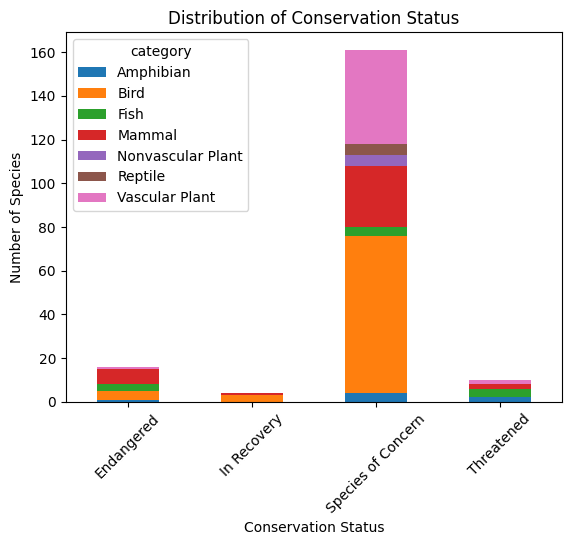

In [17]:
plt.figure(figsize=(10,6))
conservationCategory.plot(kind = 'bar', stacked=True)
plt.title('Distribution of Conservation Status')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
plt.xticks(rotation=45)
plt.show()


## Are certain types of species more likely to be endangered?

In [18]:
species['is_protected'] = species.conservation_status != 'No Intervention'
species.head(1)

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False


In [19]:
endangered_species = species[species['conservation_status'] == 'Endangered']
endangered_species.groupby('category').value_counts()

category        scientific_name               common_names                                                 conservation_status  is_protected
Amphibian       Rana sierrae                  Sierra Nevada Yellow-Legged Frog                             Endangered           True            1
Bird            Grus americana                Whooping Crane                                               Endangered           True            1
                Gymnogyps californianus       California Condor                                            Endangered           True            1
                Picoides borealis             Red-Cockaded Woodpecker                                      Endangered           True            1
                Vermivora bachmanii           Bachman's Warbler, Bachman's Wood Warbler                    Endangered           True            1
Fish            Chasmistes liorus             June Sucker                                                  Endangered           T

In [20]:
endangered_species.groupby('category')['category'].value_counts().sort_values(ascending=False)

category
Mammal            7
Bird              4
Fish              3
Amphibian         1
Vascular Plant    1
Name: count, dtype: int64

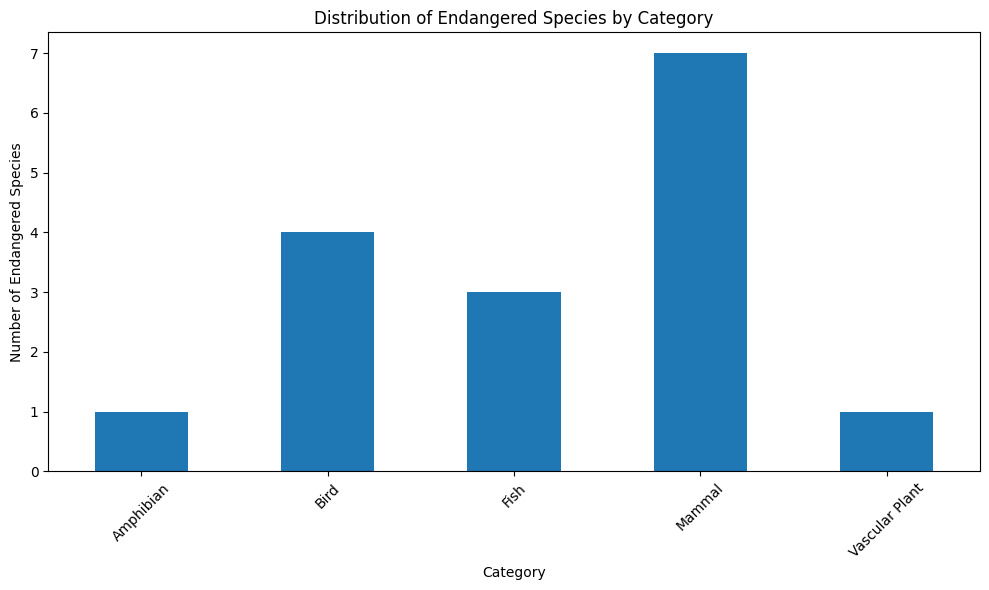

In [21]:
plt.figure(figsize=(10,6))
endangered_species.groupby('category')['category'].value_counts().plot(kind='bar')
plt.title('Distribution of Endangered Species by Category')
plt.xlabel('Category') 
plt.ylabel('Number of Endangered Species')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [22]:
category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [23]:
category_counts['percent_protected'] = category_counts.protected / \
                                      (category_counts.protected + category_counts.not_protected) * 100

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


The table shows certain types of species more likely to be endangered are Mammal

using chi2_contingency to check the significance

In [24]:
from scipy.stats import chi2_contingency

data = category_counts[['category', 'protected', 'not_protected']]

contigency = pd.DataFrame(data)

for index, row in contigency.iterrows():
    category = row['category']
    not_protected = row['not_protected']
    protected = row['protected']

    # Calculate totals for other categories
    other_not_protected = contigency['not_protected'].sum() - not_protected
    other_protected = contigency['protected'].sum() - protected

    # Create the contingency table
    observed = [[protected, not_protected], [other_protected, other_not_protected]]

    chi2, p, dof, expected = chi2_contingency(observed)

    print(f"Category: {category}")
    print(f"Chi-squared: {chi2:.4f}")
    print(f"P-value: {p:.4f}")
    print("-" * 20)
    

Category: Amphibian
Chi-squared: 6.4050
P-value: 0.0114
--------------------
Category: Bird
Chi-squared: 248.0417
P-value: 0.0000
--------------------
Category: Fish
Chi-squared: 10.7438
P-value: 0.0010
--------------------
Category: Mammal
Chi-squared: 106.4858
P-value: 0.0000
--------------------
Category: Nonvascular Plant
Chi-squared: 2.8234
P-value: 0.0929
--------------------
Category: Reptile
Chi-squared: 1.6322
P-value: 0.2014
--------------------
Category: Vascular Plant
Chi-squared: 270.0849
P-value: 0.0000
--------------------


- There's a significant association between protection status and being an amphibian, bird, fish, mammal, or vascular plant.
- There's no significant association between protection status and being a nonvascular plant or reptile.

This suggests that birds, mammals, and vascular plants have a very strong relationship with if they are protected or not. Amphibians and fish also have a significant relationship with protection status, but to a lesser degree. Nonvascular plants and reptiles do not have a significant relationship with protection status.

## Which animal is most prevalent and what is their distribution amongst parks? Are there any notable differences in the number of observations for a specific species between the parks?

In [25]:
species.head()

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False


we gonna look into the common_names column to look the common from each species category

In [26]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

def common_names(category):
    commons = species[species.category == category]\
        .common_names\
        .apply(remove_punctuations)\
        .str.split().tolist()

    cleanRows = []
    for item in commons:
        item = list(dict.fromkeys(item))
        cleanRows.append(item)

    common = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
    
    words_counted = []
    for i in common:
        x = common.count(i)
        words_counted.append((i,x))

    common_list = pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)
    
    return common_list

In [27]:
for cat in species.category.unique():
    print(f'\nMost common names in {cat}')
    print(common_names(cat))


Most common names in Mammal
         Word  Count
178       Bat     23
51      Shrew     18
124    Myotis     17
132     Mouse     16
161  Chipmunk     13
130  American     12
14   Squirrel     12
203   Eastern     11
46       Vole     11
49    Western     10

Most common names in Bird
           Word  Count
153     Warbler     59
380     Sparrow     29
82     American     21
370    Northern     20
392  Flycatcher     18
216         Owl     18
361      Common     18
171     Western     12
96   Woodpecker     12
242   Sandpiper     11

Most common names in Reptile
          Word  Count
52       Snake     27
60    Northern     15
93     Eastern     11
16      Turtle     11
79      Lizard      9
31       Skink      7
6    Kingsnake      6
19      Garter      5
46     Western      5
14  California      4

Most common names in Amphibian
          Word  Count
58  Salamander     41
83        Frog     14
41    Northern      8
65        Toad      7
69     Eastern      7
92    Southern      6
56

- the most common in Mammal is Bat
- the most common in Bird is Warbler     
- the most common in Reptile is Snake       
- the most common in Amphibian is Salamander       
- the most common in Fish is Shiner            
- the most common in Vascular Plant is Sedge           
- the most common in Nonvascular Plant is Moss      

### Distribution observation

In [28]:
import re

def distribution_obs(name):
    observations_copy = observations.copy()
    column_name = 'is_'+name
    species[column_name] = species['common_names'].str.contains(r'\b' + re.escape(name) + r'\b', regex=True, flags=re.IGNORECASE)
    name_observations = observations_copy.merge(species[species[column_name]])
    name_observations.groupby('park_name').observations.sum().reset_index()
    obs_by_park = name_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
    return obs_by_park

def visualize(data, name):
    plt.figure(figsize=(16, 4))
    sns.barplot(x=data.park_name, y= data.observations, hue=data.is_protected)
    plt.xlabel('National Parks')
    plt.ylabel('Number of Observations')
    plt.title(f'Observations of {name} per Week')
    plt.show()

In [29]:
bat = distribution_obs('bat')
bat

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


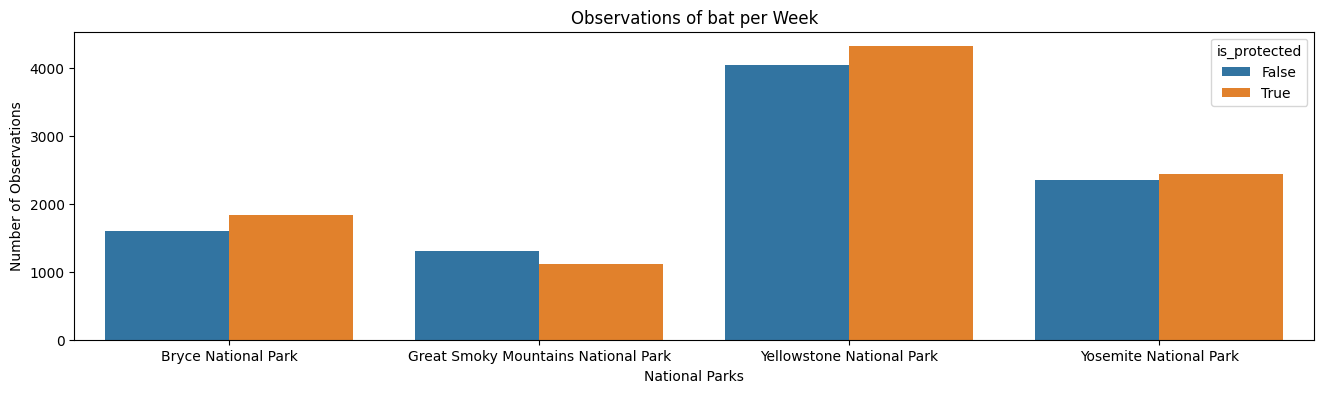

In [30]:
visualize(bat, 'bat')

In [31]:
warbler = distribution_obs('warbler')
warbler

,park_name,is_protected,observations
0,Bryce National Park,False,5565
1,Bryce National Park,True,195
2,Great Smoky Mountains National Park,False,4290
3,Great Smoky Mountains National Park,True,145
4,Yellowstone National Park,False,13995
5,Yellowstone National Park,True,492
6,Yosemite National Park,False,8441
7,Yosemite National Park,True,271


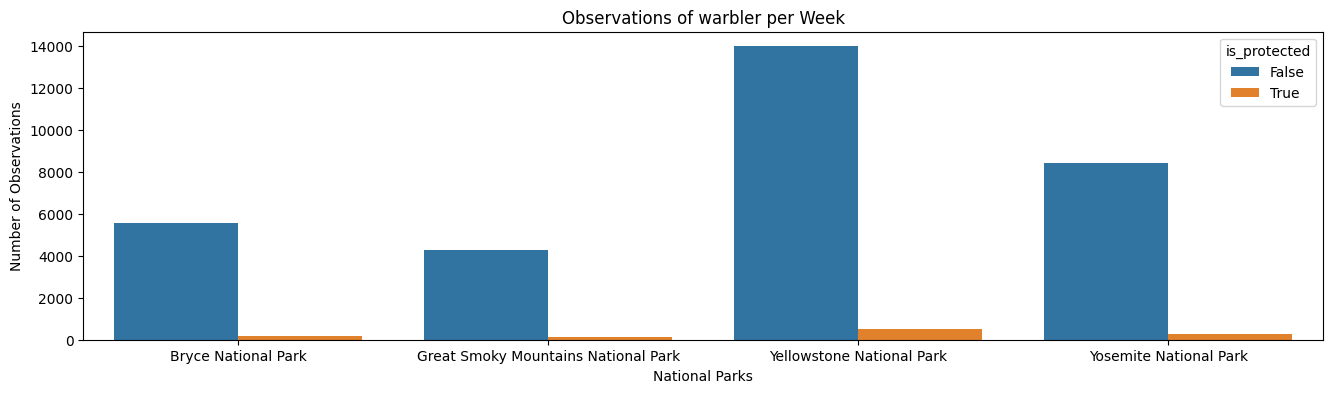

In [32]:
visualize(warbler, 'warbler')

In [33]:
snake = distribution_obs('snake')
snake

,park_name,is_protected,observations
0,Bryce National Park,False,3115
1,Bryce National Park,True,229
2,Great Smoky Mountains National Park,False,2199
3,Great Smoky Mountains National Park,True,175
4,Yellowstone National Park,False,7503
5,Yellowstone National Park,True,646
6,Yosemite National Park,False,4396
7,Yosemite National Park,True,427


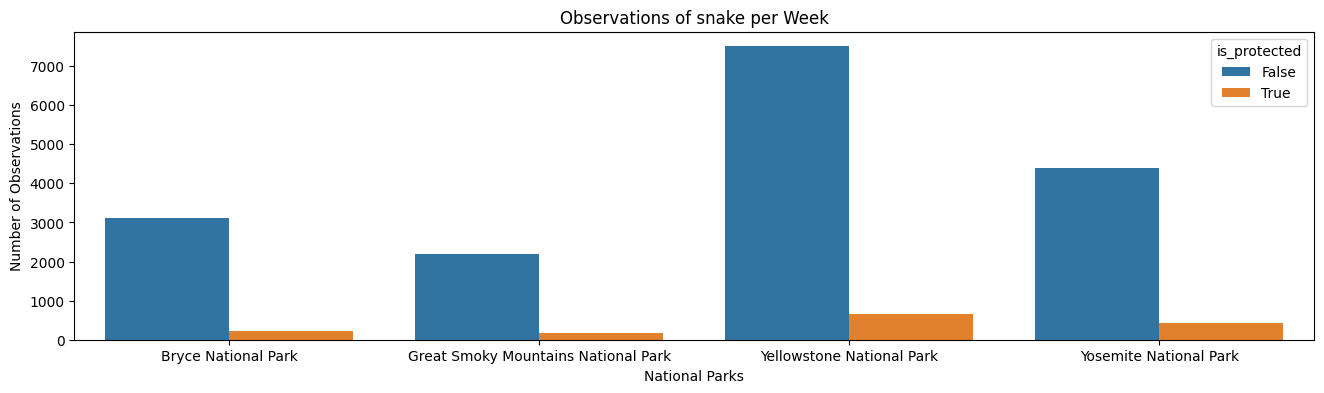

In [34]:
visualize(snake, 'snake')

In [35]:
salamander = distribution_obs('salamander')
salamander

,park_name,is_protected,observations
0,Bryce National Park,False,3723
1,Bryce National Park,True,223
2,Great Smoky Mountains National Park,False,2863
3,Great Smoky Mountains National Park,True,160
4,Yellowstone National Park,False,9844
5,Yellowstone National Park,True,390
6,Yosemite National Park,False,5885
7,Yosemite National Park,True,289


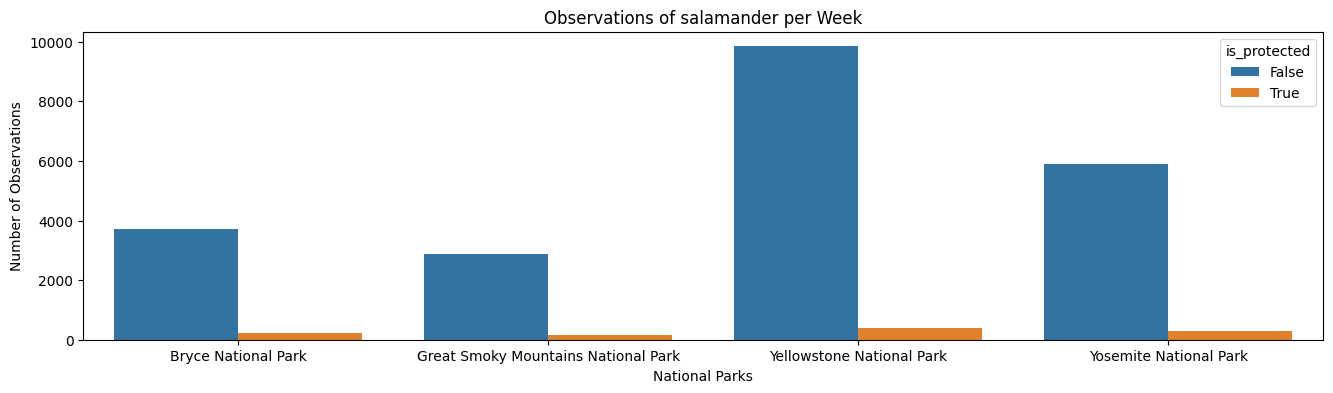

In [36]:
visualize(salamander, 'salamander')

In [37]:
shiner = distribution_obs('shiner')
shiner

,park_name,is_protected,observations
0,Bryce National Park,False,2177
1,Great Smoky Mountains National Park,False,1578
2,Yellowstone National Park,False,4750
3,Yosemite National Park,False,2968


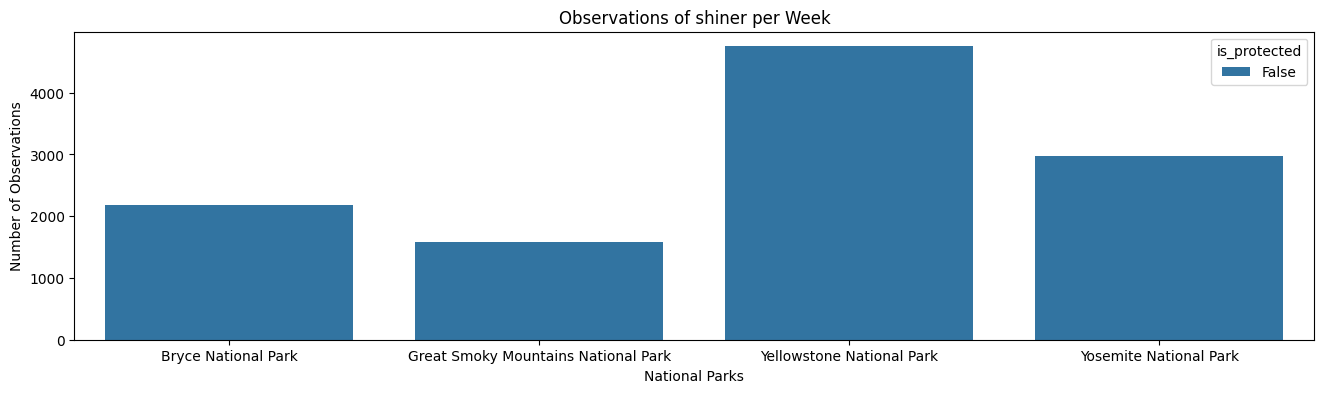

In [38]:
visualize(shiner, 'shiner')

In [39]:
sedge = distribution_obs('sedge')
sedge

,park_name,is_protected,observations
0,Bryce National Park,False,24090
1,Bryce National Park,True,81
2,Great Smoky Mountains National Park,False,18267
3,Great Smoky Mountains National Park,True,89
4,Yellowstone National Park,False,60151
5,Yellowstone National Park,True,224
6,Yosemite National Park,False,36997
7,Yosemite National Park,True,163


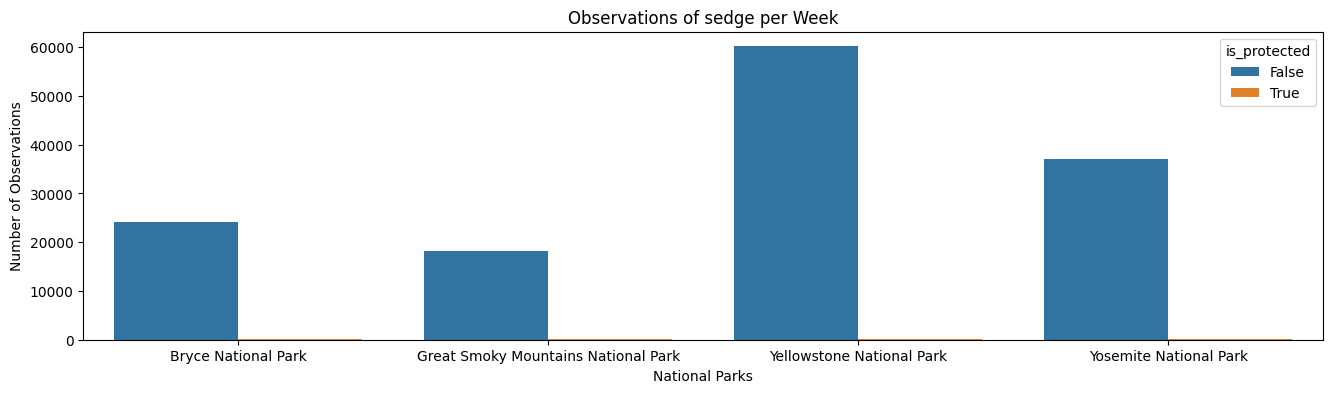

In [40]:
visualize(sedge, 'sedge')

In [41]:
moss = distribution_obs('moss')
moss

,park_name,is_protected,observations
0,Bryce National Park,False,28690
1,Bryce National Park,True,270
2,Great Smoky Mountains National Park,False,21464
3,Great Smoky Mountains National Park,True,174
4,Yellowstone National Park,False,72104
5,Yellowstone National Park,True,679
6,Yosemite National Park,False,43248
7,Yosemite National Park,True,414


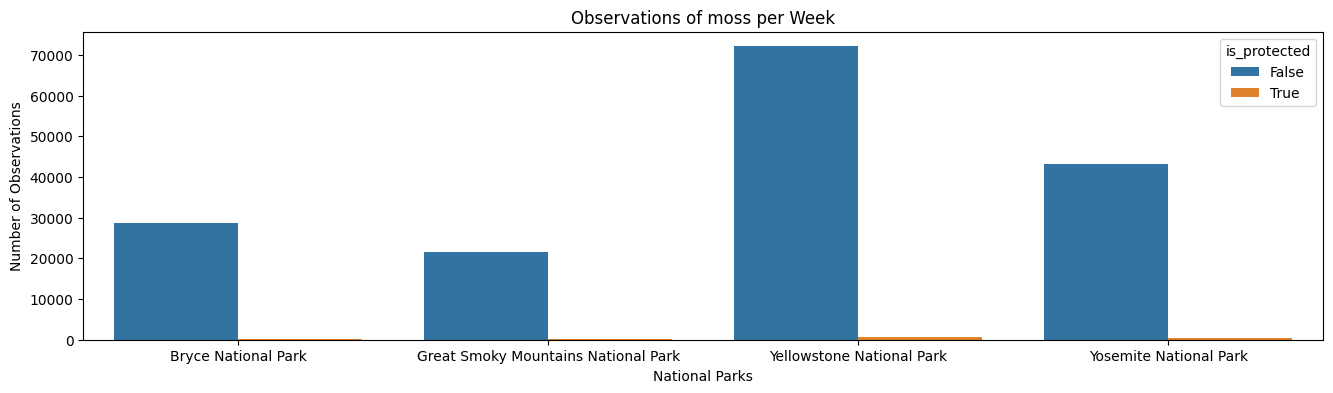

In [42]:
visualize(moss, 'moss')

yellowstone national park have the most prevalent spesies 

In [43]:
# try uncommon species
bear = distribution_obs('bear')
bear

,park_name,is_protected,observations
0,Bryce National Park,False,743
1,Bryce National Park,True,38
2,Great Smoky Mountains National Park,False,552
3,Great Smoky Mountains National Park,True,50
4,Yellowstone National Park,False,1658
5,Yellowstone National Park,True,115
6,Yosemite National Park,False,1080
7,Yosemite National Park,True,73


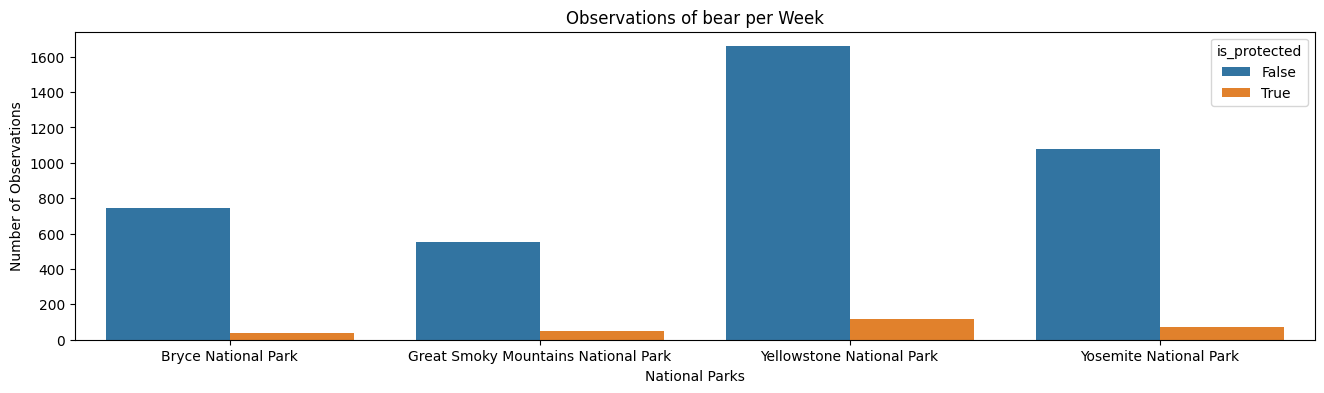

In [44]:
visualize(bear, 'bear')

In [45]:
distribution_obs('deer')

,park_name,is_protected,observations
0,Bryce National Park,False,1051
1,Great Smoky Mountains National Park,False,737
2,Yellowstone National Park,False,2807
3,Yosemite National Park,False,1673


This also tell that Yellowstone have the most number of species